In [1]:
import torch
import numpy as np

In [2]:
array = np.array([0, 1, 2])
new_torch = torch.from_numpy(array)
print(new_torch)

tensor([0, 1, 2], dtype=torch.int32)


A tensor on PyTorch has three attributes:

shape: the size of the tensor
data type: the type of data stored in the tensor
device: the device in which the tensor is stored

If we print the attributes from the tensor we created, we'll have the following:

In [4]:
print(new_torch.shape)
print(new_torch.dtype)
print(new_torch.device)

torch.Size([3])
torch.int32
cpu


It's also possible to create a tensor from another tensor. In this case, the new tensor inherits the characteristics of the initial one.

In [8]:
new_tensor =torch.rand_like(new_torch, dtype=torch.float)
print(new_tensor)

tensor([0.9698, 0.1431, 0.1871])


Note that the rand_like() function creates a new tensor with shape (2, 2). However, as the function returns values from 0 to 1, we had to overwrite the data type to float.

You can define a simple one dimensional matrix as below:

In [10]:
torch.FloatTensor([1])

tensor([1.])

An example of a simple addition operation in PyTorch:

In [12]:
tensor_1 = torch.FloatTensor([2])
tensor_2 = torch.FloatTensor([3])
print("=== Summation of Two tensor ===")
print(tensor_1 + tensor_2)

=== Summation of Two tensor ===
tensor([5.])


Matrix Operations using Tensors

In [13]:
matrix = torch.rand(3, 3)
print(matrix)

tensor([[0.2207, 0.3120, 0.3240],
        [0.4192, 0.4469, 0.5357],
        [0.8205, 0.3055, 0.8796]])


Transpose of Matrix

In [14]:
transpose_matrix = matrix.t()
print(transpose_matrix)

tensor([[0.2207, 0.4192, 0.8205],
        [0.3120, 0.4469, 0.3055],
        [0.3240, 0.5357, 0.8796]])


Case Study – Solving an Image Recognition problem in PyTorch

In [21]:
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [22]:
training_data = datasets.MNIST(root=".",train=True,download=True,transform=transforms.ToTensor())
test_data = datasets.MNIST(root=".",train=False,download=True,transform=transforms.ToTensor())

In [23]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [25]:
figure= plt.figure(figsize=(8,8))
cols,row = 5,5

<Figure size 800x800 with 0 Axes>

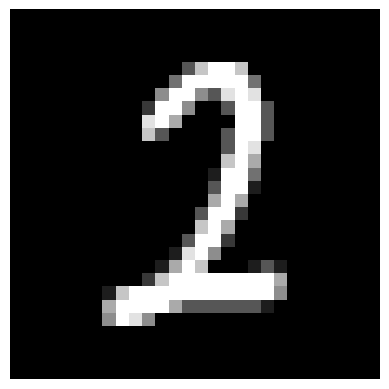

In [29]:
for i in range(1,cols*row + 1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img , label = training_data[sample_idx]
    figure.add_subplot(row,cols,i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="grey")
plt.show()    

In [30]:
from torch.utils.data import DataLoader

loaded_train = DataLoader(training_data, batch_size=64, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=64, shuffle=True)